### Race and Offenses of Ohio Youth Prisons 
#### Bianca Amoako
#### 12/10/2024

I am interested in looking at the data available from the youth prisons in Ohio. Underneath the [Ohio Department of Youth Services](https://dys.ohio.gov/wps/portal/gov/dys/home), there are three youth prisons in Ohio that are accredited by the American Correctional Association. The three facilities are:
-  Cuyahoga Hills Juvenile Correctional Facility (CHJCF)
-  Indian River Juvenile Correctional Facility (IRJCF)
-  Circleville Juvenile Correctional Facility (CJCF)

All three facilities serve only male youth and have a variety of programs to reform the youth population admitted.

![](map_facilities.png)

---
#### DataOhio dataset [Youth Services Current Facility Population](https://data.ohio.gov/wps/portal/gov/data/view/youth-services-current-facility-population?visualize=true) 
This data shows the current population (as of November 22, 2024) of all of the correctional facilities in Ohio. I selected the three youth prisons and their race break down and exported it as a pdf file, which was the only option for the data. To convert the pdfs to csv files I will use the tabula-py and it's function .convert_into(). This will take the pdf file name and return a csv file to my directory. I will turn those csv files into a Pandas DataFrame using .DataFrame(pd.read_csv()) with the csv file returned from Tabula.

In [138]:
import tabula
import pandas as pd

In [139]:
#Cuyahoga Hills JCF
tabula.convert_into("cuyahoga_by_race.pdf", "cuya_by_race.csv", output_format="csv", pages='all')
cuyah_race_df = pd.DataFrame(pd.read_csv("cuya_by_race.csv"))
#tidy
cuyah_race_df["Facility"] = "CHJCF"
cuyah_race_df.loc[3, "Race"] = "Mixed-Race"
cuyah_race_df = cuyah_race_df.drop(5)
cuyah_race_df = cuyah_race_df.rename(columns={"Current\rPopulation": "Current Population"})
cuyah_race_df

,Race,Current Population,Facility
0,White,19,CHJCF
1,Black,153,CHJCF
2,Hispanic,7,CHJCF
3,Mixed-Race,5,CHJCF
4,Asian,1,CHJCF


In [140]:
#Indian River JCF
tabula.convert_into("indian_river_by_race.pdf", "indian_by_race.csv", output_format="csv", pages='all')
indian_race_df = pd.DataFrame(pd.read_csv("indian_by_race.csv"))
#tidy
indian_race_df["Facility"] = "IRJCF"
indian_race_df.loc[4, "Race"] = "American Indian"
indian_race_df = indian_race_df.drop(5)
indian_race_df = indian_race_df.rename(columns={"Current\rPopulation": "Current Population"})
indian_race_df

,Race,Current Population,Facility
0,White,28,IRJCF
1,Black,113,IRJCF
2,Hispanic,8,IRJCF
3,Mixed-Race,5,IRJCF
4,American Indian,1,IRJCF


In [141]:
#Circleville JCF
tabula.convert_into("circleville_by_race.pdf", "circle_by_race.csv", output_format="csv", pages='all')
circle_race_df = pd.DataFrame(pd.read_csv("circle_by_race.csv"))
#tidy
circle_race_df["Facility"] = "CJCF"
circle_race_df.loc[4, "Race"] = "American Indian"
circle_race_df = circle_race_df.drop(5)
circle_race_df = circle_race_df.rename(columns={"Current\rPopulation": "Current Population"})
circle_race_df

,Race,Current Population,Facility
0,White,30,CJCF
1,Black,107,CJCF
2,Hispanic,6,CJCF
3,Mixed-Race,2,CJCF
4,American Indian,2,CJCF


#### Race Breakdown as Pie Charts across the three youth prisons
To visualize the race breakdowns for the three youth prisons, I will use matplotlib's pie chart function .pie() and numpy to help generate colors from a pre-defined colormap.

In [142]:
from matplotlib import pyplot as plt
import numpy as np

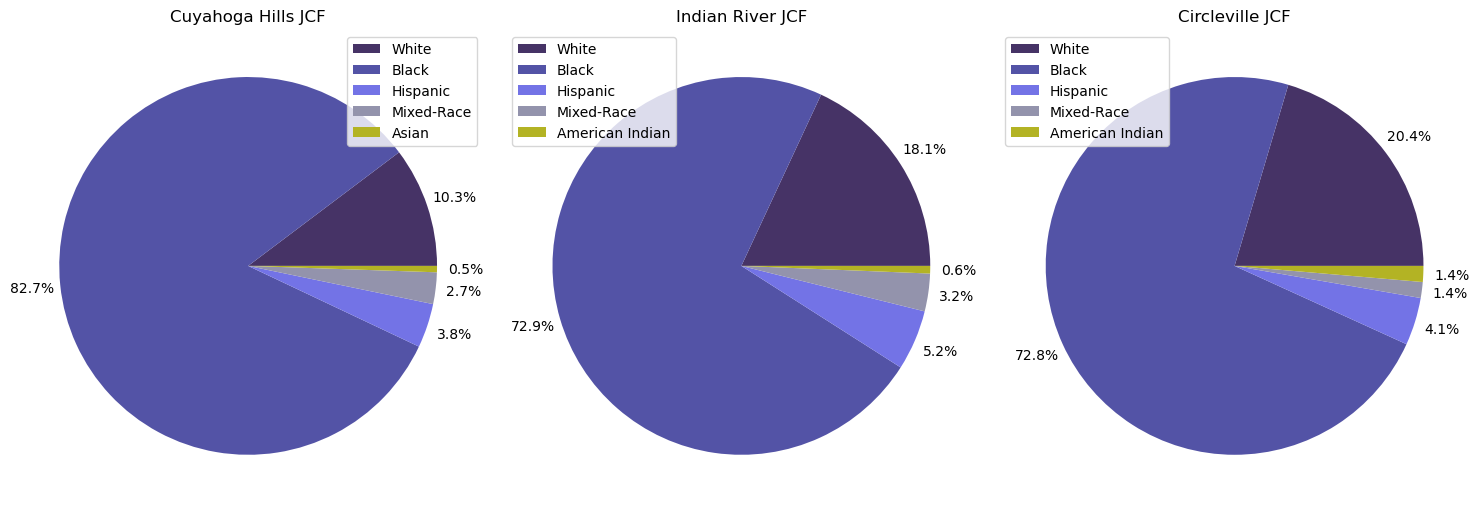

In [143]:
fig1, ax1 = plt.subplots(1,3, figsize = (15, 20))
colors_ = plt.get_cmap('gist_stern')(np.linspace(0.2, 0.7, len(cuyah_race_df)))

#Cuyahoga Pie
ax1[0].pie(cuyah_race_df["Current Population"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax1[0].set_title("Cuyahoga Hills JCF")
ax1[0].legend(cuyah_race_df["Race"], loc = "best")

#Indian River Pie
ax1[1].pie(indian_race_df["Current Population"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax1[1].set_title("Indian River JCF")
ax1[1].legend(indian_race_df["Race"], loc = "best")


#Circleville Pie
ax1[2].pie(circle_race_df["Current Population"], colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax1[2].set_title("Circleville JCF")
ax1[2].legend(circle_race_df["Race"], loc = "best")

fig1.tight_layout()
plt.show()

#### There's clearly a much greater number of Black or African Americans admitted to these correctional facilities as shown in the pie charts above. 
It's an unbalanced number across the races admitted where all of the other races combined (White, Hispanic, Mixed-Race, Asian, and American Indian) are a small portion of just the Black youth. There is close to no diversity in the youth prisons. Why is there such a large amount of Black youth populating the youth prisons? Were they admitted for similar crimes as the others? 


#### Hypothesis: African American admissions have a majority offense that leads to their placements across the three youth prisons.
-------
#### DataOhio has a subset of up-to-date data files that describe how many of the youth are admitted due to [sex offenses](https://data.ohio.gov/wps/portal/gov/data/view/youth-services-sex-offender-population?visualize=true)  and [gun offenses](https://data.ohio.gov/wps/portal/gov/data/view/youth-services-gun-specification-population?visualize=true).
In Ohio, a sexual offense is a crime that involves sexual conduct or the possession of illegal sexual material.
In Ohio, a gun offense can be any illegal act involving a firearm. For example, possessing a gun without a permit or discharging a firearm in public. Minors are not allowed to possess guns.

After importing the pdfs and turning them into csv files, I am merging the main DataFrame for each youth prison with columns that represent the count of sex and gun offenses. I will use an outer merge, which combines all the rows for left and right dataframes with NaN when there are no matched values in the rows. I will show Circleville JCF and perform the same operations for Cuyahoga Hills and Indian River JCF in after.

In [144]:
#Sexual offenses Circleville JCF
tabula.convert_into("Circleville_sex_off_youth.pdf", "circle_sexoff_race.csv", output_format="csv", pages='1')
circle_sexoff_df = pd.DataFrame(pd.read_csv("circle_sexoff_race.csv"))
circle_sexoff_df = circle_sexoff_df.drop(3).rename(columns={"Current\rPopulation": "Sex Offenses"})
circle_sexoff_df 

,Race,Sex Offenses
0,White,10
1,Black,5
2,Hispanic,2


In [145]:
#Gun offenses Circleville JCF
tabula.convert_into("circle_gun_off_youth.pdf", "circle_gunoff_race.csv", output_format="csv", pages='1')
circle_gunoff_df = pd.DataFrame(pd.read_csv("circle_gunoff_race.csv"))
circle_gunoff_df = circle_gunoff_df.drop(4).rename(columns={"Current\rPopulation": "Gun Offenses"})
circle_gunoff_df

,Race,Gun Offenses
0,White,8
1,Black,68
2,Hispanic,3
3,American Indian,1


In [146]:
circle_race_df = pd.merge(circle_race_df, circle_sexoff_df, how = "outer").merge(circle_gunoff_df, how = "outer")
#replace NaN with 0s
circle_race_df.fillna(0, inplace = True)
circle_race_df["Sex Offenses"] = circle_race_df["Sex Offenses"].astype(int)
circle_race_df["Gun Offenses"] = circle_race_df["Gun Offenses"].astype(int)
circle_race_df

,Race,Current Population,Facility,Sex Offenses,Gun Offenses
0,American Indian,2,CJCF,0,1
1,Black,107,CJCF,5,68
2,Hispanic,6,CJCF,2,3
3,Mixed-Race,2,CJCF,0,0
4,White,30,CJCF,10,8


I will repeat the steps above for Cuyahoga and Indian River JCF

In [147]:
#Sexual offenses Cuyahoga Hills JCF
tabula.convert_into("Cuya_sex_off_youth.pdf", "cuyah_sexoff_race.csv", output_format="csv", pages='1')
cuyah_sexoff_df = pd.DataFrame(pd.read_csv("cuyah_sexoff_race.csv"))
cuyah_sexoff_df = cuyah_sexoff_df.drop(3).rename(columns={"Current\rPopulation": "Sex Offenses"})
#Gun offenses Cuyahoga Hills JCF
tabula.convert_into("cuy_gun_off_youth.pdf", "cuyah_gunoff_race.csv", output_format="csv", pages='1')
cuyah_gunoff_df = pd.DataFrame(pd.read_csv("cuyah_gunoff_race.csv"))
cuyah_gunoff_df = cuyah_gunoff_df.drop(4).rename(columns={"Current\rPopulation": "Gun Offenses"})

cuyah_race_df = pd.merge(cuyah_race_df, cuyah_sexoff_df, how = "outer").merge(cuyah_gunoff_df, how = "outer")
cuyah_race_df.fillna(0, inplace = True)
cuyah_race_df["Sex Offenses"] = cuyah_race_df["Sex Offenses"].astype(int)
cuyah_race_df["Gun Offenses"] = cuyah_race_df["Gun Offenses"].astype(int)
cuyah_race_df

,Race,Current Population,Facility,Sex Offenses,Gun Offenses
0,Asian,1,CHJCF,0,1
1,Black,153,CHJCF,4,109
2,Hispanic,7,CHJCF,0,6
3,Mixed-Race,5,CHJCF,1,3
4,White,19,CHJCF,9,0


In [148]:
#Sexual offenses Indian River JCF
tabula.convert_into("indian_sex_off_youth.pdf", "indian_sexoff_race.csv", output_format="csv", pages='1')
indian_sexoff_df = pd.DataFrame(pd.read_csv("indian_sexoff_race.csv"))
indian_sexoff_df = indian_sexoff_df.drop(3).rename(columns={"Current\rPopulation": "Sex Offenses"})
#Gun offenses Indian River JCF
tabula.convert_into("indian_gun_off_youth.pdf", "indian_gunoff_race.csv", output_format="csv", pages='1')
indian_gunoff_df = pd.DataFrame(pd.read_csv("indian_gunoff_race.csv"))
indian_gunoff_df = indian_gunoff_df.drop(5).rename(columns={"Current\rPopulation": "Gun Offenses"})

indian_race_df = pd.merge(indian_race_df, indian_sexoff_df, how = "outer").merge(indian_gunoff_df, how = "outer")
indian_race_df.fillna(0, inplace = True)
indian_race_df["Sex Offenses"] = indian_race_df["Sex Offenses"].astype(int)
indian_race_df["Gun Offenses"] = indian_race_df["Gun Offenses"].astype(int)
indian_race_df

,Race,Current Population,Facility,Sex Offenses,Gun Offenses
0,American Indian,1,IRJCF,0,1
1,Black,113,IRJCF,5,60
2,Hispanic,8,IRJCF,0,3
3,Mixed-Race,5,IRJCF,2,2
4,White,28,IRJCF,9,5


---
#### Offenses for African Americans Across Three Youth Prisons in Ohio

In [149]:
circle_afr = [circle_race_df["Sex Offenses"][1], \
              circle_race_df["Gun Offenses"][1], \
              circle_race_df["Current Population"][1]-circle_race_df["Sex Offenses"][1]-circle_race_df["Gun Offenses"][1]]
cuyah_afr = [cuyah_race_df["Sex Offenses"][1], \
            cuyah_race_df["Gun Offenses"][1], \
            cuyah_race_df["Current Population"][1]-cuyah_race_df["Sex Offenses"][1]-cuyah_race_df["Gun Offenses"][1]]
indian_afr = [indian_race_df["Sex Offenses"][1], \
            indian_race_df["Gun Offenses"][1], \
            indian_race_df["Current Population"][1]-indian_race_df["Sex Offenses"][1]-indian_race_df["Gun Offenses"][1]]

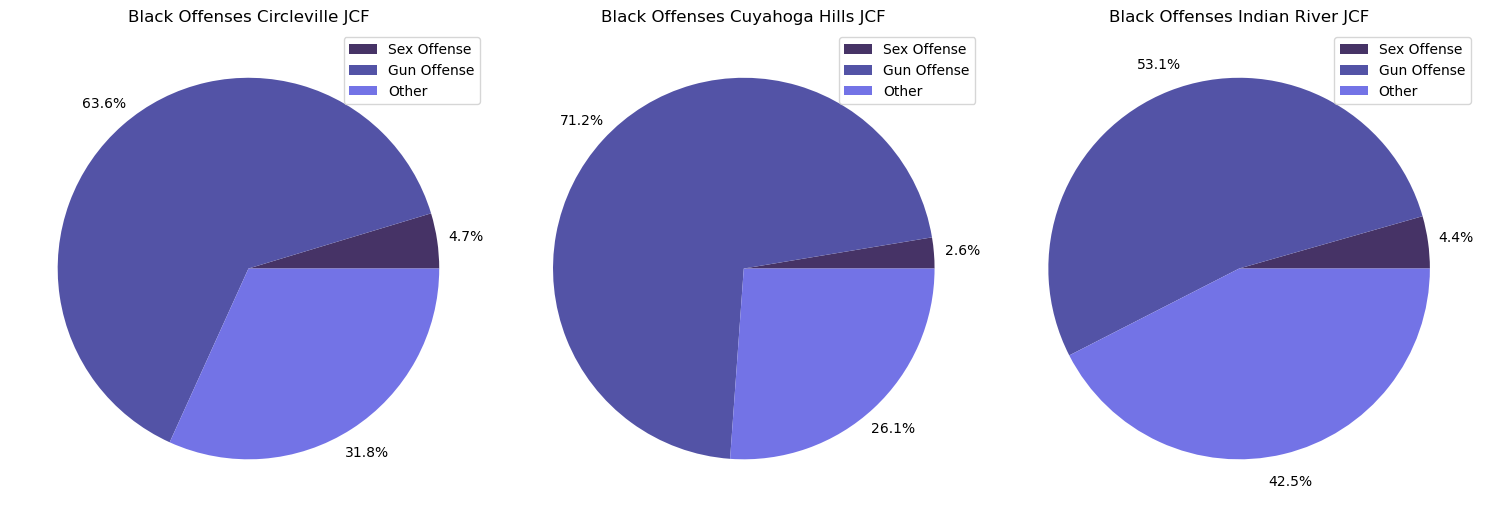

In [150]:
# 3 pie charts African American Circleville, Cuyahoga Hills, and Indian River
fig2, ax2 = plt.subplots(1,3, figsize = (15, 20))
labels = ["Sex Offense", "Gun Offense", "Other"]
#Circleville Pie
ax2[0].pie(circle_afr, colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax2[0].legend(labels, loc = "best")
ax2[0].set_title("Black Offenses Circleville JCF")
#Cuyahoga Hills Pie
ax2[1].pie(cuyah_afr, colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax2[1].legend(labels, loc = "best")
ax2[1].set_title("Black Offenses Cuyahoga Hills JCF")
#Indian River Pie
ax2[2].pie(indian_afr, colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax2[2].legend(labels, loc = "best")
ax2[2].set_title("Black Offenses Indian River JCF")

fig2.tight_layout()
plt.show()

The pie charts above shows that gun offenses are the majority charge that Black youth have when admitted to the three youth prisons in Ohio. 63.6% of Circleville JCF, 71.2% of Cuyahoga Hills JCF, and 53.1% of Indian River Black youth have gun charges. For some reason, Black youth show a pattern of facing gun charges that lead them to admission to a youth prison. There is another substantial portion that is unknown ("Other" category) where the data is not public but could help paint a clearer picture of the Black youth. 

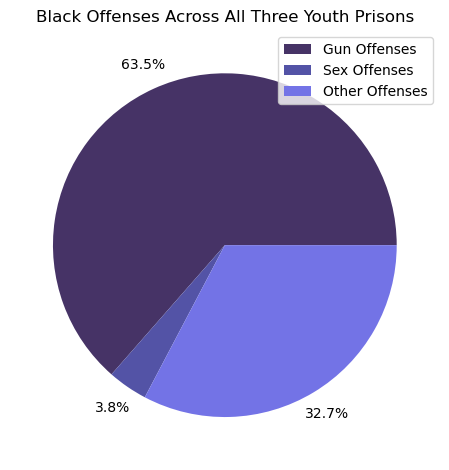

In [151]:
#How many gun charges constitute the total population of all black youth three youth prisons
total_black = circle_race_df.iloc[1]["Current Population"] \
    + cuyah_race_df.iloc[1]["Current Population"] + indian_race_df.iloc[1]["Current Population"]
total_gun = circle_race_df.iloc[1]["Gun Offenses"] + cuyah_race_df.iloc[1]["Gun Offenses"] + indian_race_df.iloc[1]["Gun Offenses"]
total_sex = circle_race_df.iloc[1]["Sex Offenses"] + cuyah_race_df.iloc[1]["Sex Offenses"] + indian_race_df.iloc[1]["Sex Offenses"]
total_other = total_black - total_gun - total_sex
black_pie = [total_gun, total_sex, total_other]


fig3, ax3 = plt.subplots()

ax3.pie(black_pie, colors = colors_, autopct = '%1.1f%%', pctdistance = 1.15)
ax3.legend(["Gun Offenses", "Sex Offenses", "Other Offenses"], loc = "best")
ax3.set_title("Black Offenses Across All Three Youth Prisons")

fig3.tight_layout()
plt.show()

#### In conclusion
Across all three youth prisons, 63.5% of Black youth are admitted under gun charges. Since in each prison is majority of the minors are Black, majority of the them are also there under gun charges. Hopefully, this would be a main focus in the reform program of the youth prisons to better help their population. 
This data also shows leads me to believe, in Ohio, there is a culture of gun posession that Black youth are apprehended for that inducts them to the Department of Youth Services youth prisons. 

----

#### Further Steps
It would be helpful to know the location of the offense for the youth admitted to draw conclusions on youth criminial rates by location. 
I know that minors' personal information is private, but offense descriptions would help. 
Especially in the case of the "other" catergory, there is a lot of unknown reasons for being admitted to the youth prisons. 
In addition, knowing the context of the different gun offenses would help draw a clearer picture. 

We could also make this focused on White youth, but they do have quite a lower percent of the population in the youth prisons. Same for the other races. 